In [27]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

image_name = "birds3.jpg"

def get_path_for_image(image_name):
    # Get directory of image files relative to this file's directory
    image_dir = os.path.join(os.getcwd(), 'data', 'images', 'task_2')
    # Get image path for the provided image id
    image_path = os.path.join(image_dir, image_name)

    return image_path

def preprocess_image(image):
    # Convert the image to grayscale (to work easily with scalar threshold instead of RGB vectors)
    gray_image = image.convert('L')
    
    # Convert grayscale image to a numpy array
    gray_image_matrix = np.array(gray_image)
    
    # Apply thresholding to create a binary image (0 or 1)
    threshold = 128
    # Make the birds (darker areas) one (1), and the background zero (0)
    binary_image = (gray_image_matrix < threshold).astype(np.uint8)  
    
    return binary_image

def count_connected_components(img):
    # Preprocess image to convert it into binary form
    binary_image = preprocess_image(img)
    
    # Start labeling components from 1
    label = 1
    # Matrix of the same shape as binary image which will store the label for each pixel
    # Initially all zero (nothing labeled yet)
    labels = np.zeros_like(binary_image, dtype=np.int32)
    
    # Define all possible directions to neighbors around a pixel
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    
    def depth_first_label(i, j, label):
        # Stack to keep coordinates of the pixels that still need to be processed
        # during the depth search first. Starts with the currently given input pixel.
        stack = [(i, j)]
        # Assign label to the current pixel
        labels[i, j] = label
        
        while len(stack) > 0:
            # Pop the top element of the stack
            (x, y) = stack.pop()
            # For each direction from the current pixel
            for (dx, dy) in directions:
                # Compute the coordinates of the neighboring pixel
                (nx, ny) = (x + dx, y + dy)
                # Check if the neighbor coordinates are within the bounds of the image
                if 0 <= nx < binary_image.shape[0] and 0 <= ny < binary_image.shape[1]:
                    # If the neighboring pixel is part of the foreground (1) and it hasn't
                    # been label yet
                    if binary_image[nx, ny] == 1 and labels[nx, ny] == 0:
                        # Label it and add it to stack to later check its neighbors as well
                        labels[nx, ny] = label
                        stack.append((nx, ny))
    
    # Perform connected component labeling
    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            # For each pixel, if it's foreground and hasn't been labeled before
            if binary_image[i, j] == 1 and labels[i, j] == 0:
                # Label all connected components
                depth_first_label(i, j, label)
                label += 1
                
    # Since we started labeling from 1, and increment after each connected component,
    # number of object is final value of label minus one
    num_components = label - 1
    
    return binary_image, num_components



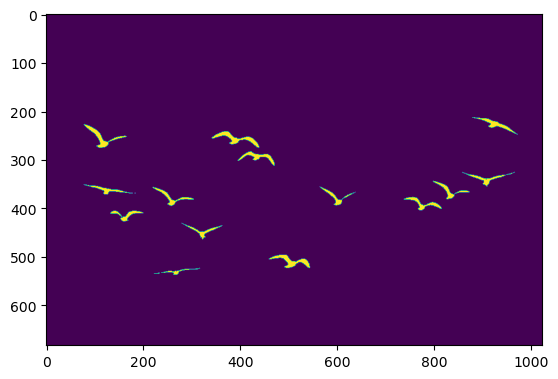

In [28]:
image_path = get_path_for_image(image_name)
image = Image.open(image_path)
binary_image, num_components = count_connected_components(image)

# Display the binary image
# plt.imshow(binary_image, cmap='gray')
plt.imshow(binary_image)
plt.show()

In [29]:
print(num_components)

20
